In [4]:
import os, sys
sys.path.append(os.path.abspath('../src'))
from chemspace import Fingerprints, load_data, NMRVector, IRVector, ChemicalSpaceGraph

In [32]:
graph = ChemicalSpaceGraph.from_file('../cache.h5', '../cache-cohen.p')
len(graph.edges)

840456

In [33]:
import pandas as pd

In [34]:
edges = pd.DataFrame([[a, b, graph.edges[(a, b)]] for a, b in graph.edges])

In [35]:
edges.describe()

,2
count,840456.000000
mean,0.036038
std,0.047018
min,-0.002443
25%,-0.000825
50%,0.025623
75%,0.057786
max,0.777699


In [41]:
e1s = edges[edges[2] > 0.54]

In [42]:
e1s

,0,1,2
247158,Cc1nc2c[nH]c(=O)cc2o1,Cc1nc2cc(=O)[nH]cc2o1,0.545265
310807,Cc1noc2c(=O)[nH]ccc12,Cc1n[nH]c(=O)c2occc12,0.555404
385221,O=c1[nH]c(-c2ccc[nH]2)co1,O=c1[nH]cc(-c2ccc[nH]2)o1,0.555397
484716,c1cc(Nc2cocn2)co1,c1cc(Nc2cnco2)co1,0.769115
489615,Cc1ncn2c(=O)occc12,Cc1coc(=O)c2nccn12,0.545265
542396,O=c1[nH]cc(-c2cc[nH]c2)o1,O=c1[nH]c(-c2cc[nH]c2)co1,0.777699
629583,Cc1c[nH]c(=O)c2ocnc12,Cc1coc(=O)c2[nH]ncc12,0.555404
698473,Cn1ncc2occc2c1=O,Cn1c(=O)ccc2oncc21,0.545270
706315,Cn1ccc2c(=O)ocnc21,Cc1cc2c(=O)ocnc2[nH]1,0.545265
712722,Cc1cnc2c(=O)occn12,Cc1cn2ccnc2c(=O)o1,0.545270


In [44]:
from matplotlib import pyplot as plt
import numpy as np

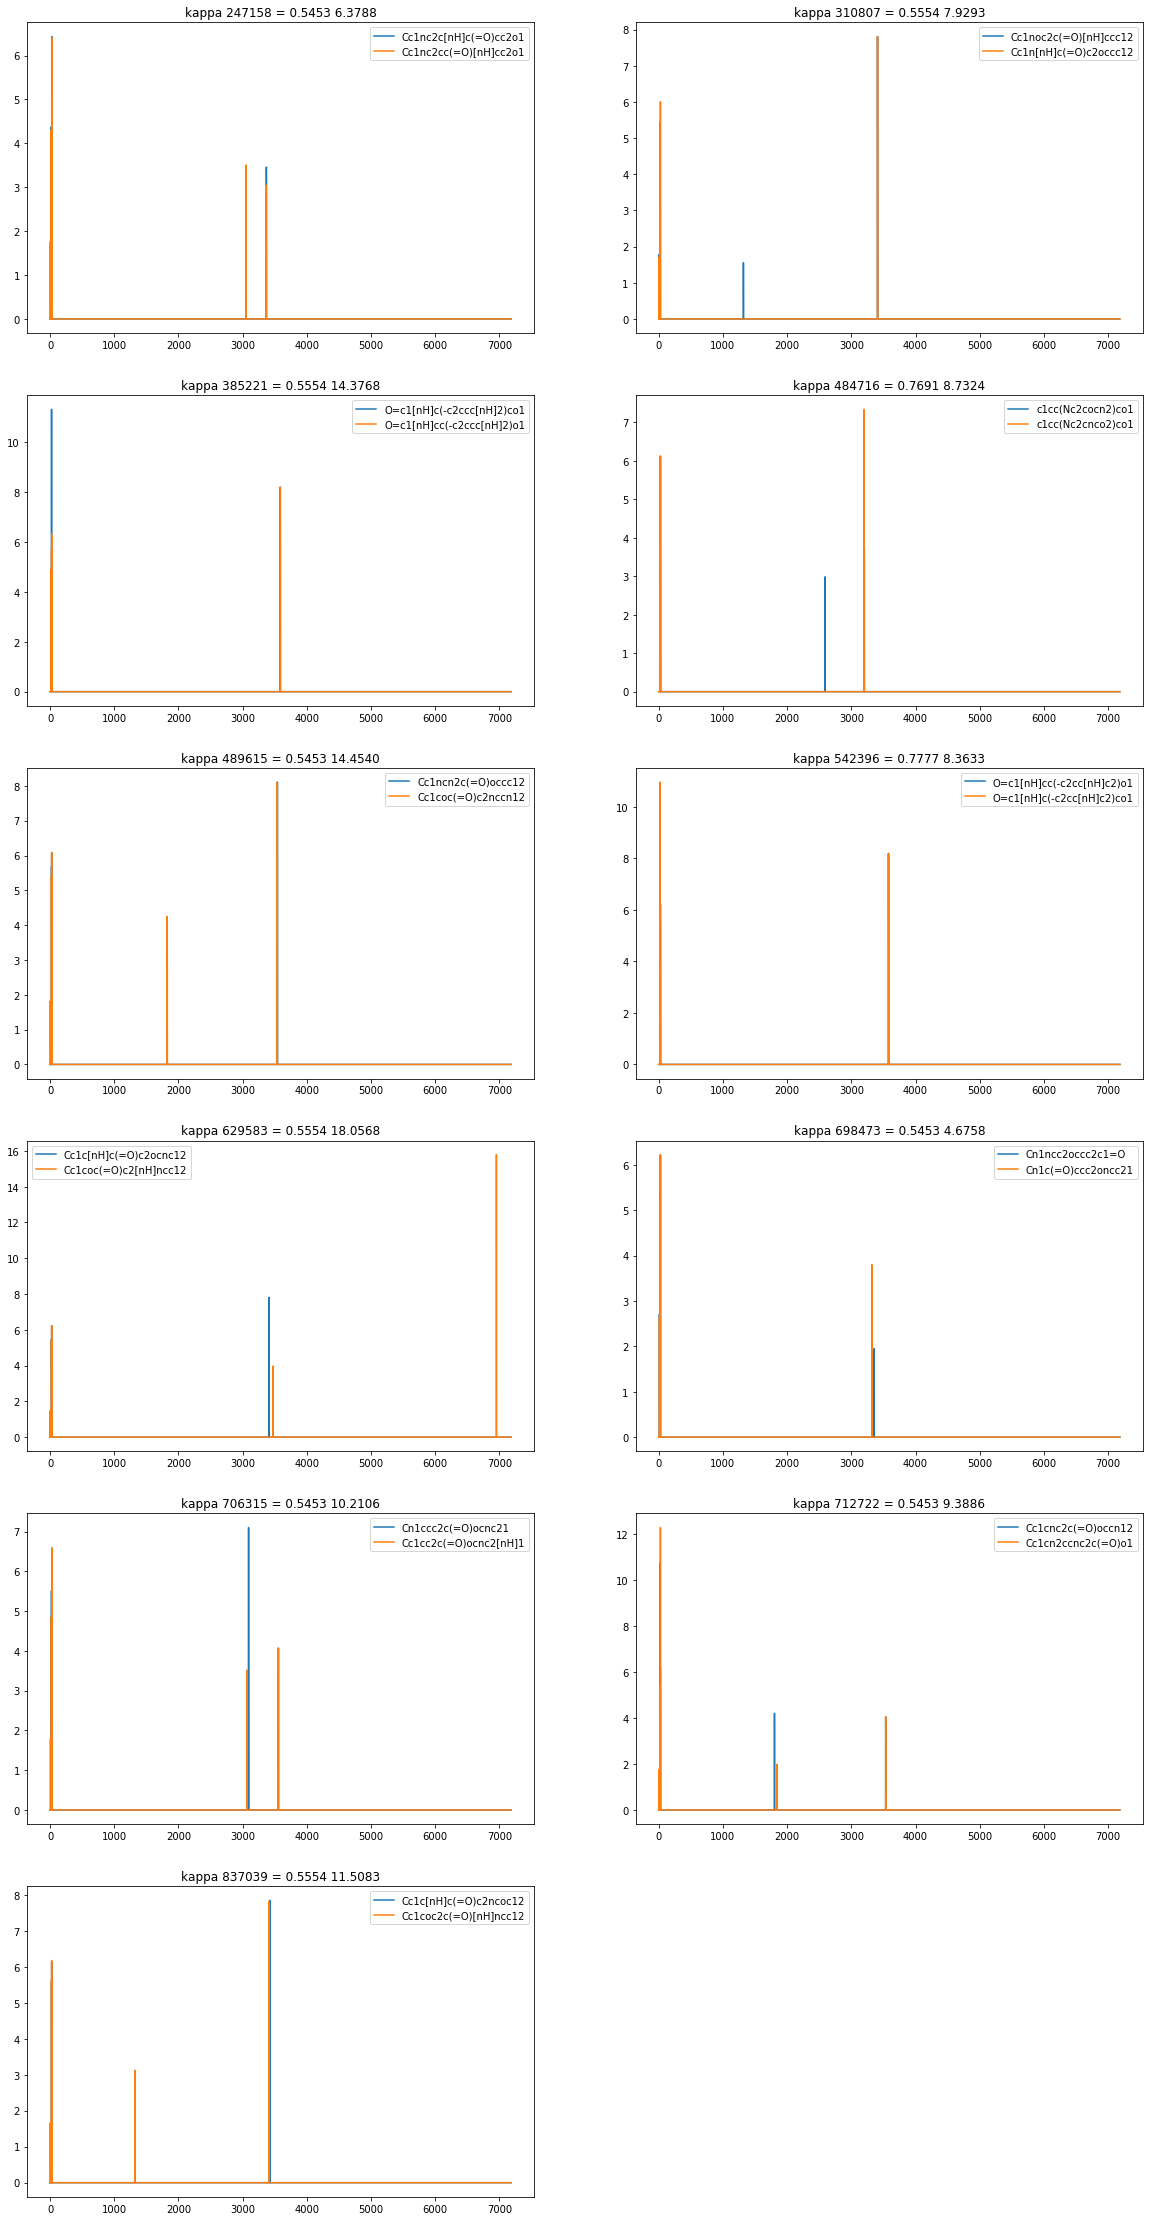

In [45]:
x = np.arange(len(graph.fingerprints_df['Cc1nc2c[nH]c(=O)cc2o1']))
plt.rcParams["figure.figsize"] = (20,40)
for i, (index, row) in enumerate(e1s.iterrows()):
    plt.subplot(6, 2, i+1)
    y1 = graph.fingerprints_df[row[0]]
    y2 = graph.fingerprints_df[row[1]]
    plt.title('kappa %d = %.4f %.4f' % (index, row[2], np.linalg.norm(y1-y2)))
    plt.plot(x, y1, label=row[0])
    plt.plot(x, y2, label=row[1])
    plt.legend()

In [52]:
graph.edges[('N#CCC1OCc2cnoc21', 'O=c1[nH]c(-c2ccc[nH]2)co1')]

-0.00045576543272396464

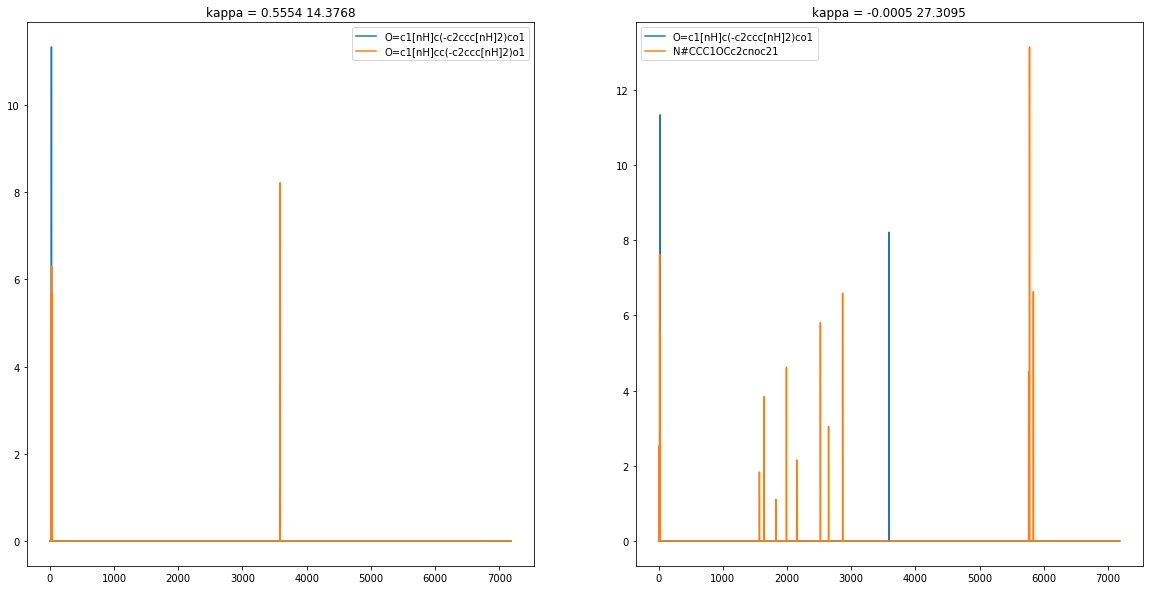

In [66]:
plt.rcParams["figure.figsize"] = (20,10)
for i, row in enumerate([
    ('O=c1[nH]c(-c2ccc[nH]2)co1', 'O=c1[nH]cc(-c2ccc[nH]2)o1'),
    ('O=c1[nH]c(-c2ccc[nH]2)co1', 'N#CCC1OCc2cnoc21')
]):
    plt.subplot(1, 2, i+1)
    y1 = graph.fingerprints_df[row[0]]
    y2 = graph.fingerprints_df[row[1]]
    plt.title('kappa = %.4f %.4f' % (
        graph.edges.get((row[0], row[1]), graph.edges.get((row[1], row[0]))), np.linalg.norm(y1-y2)))
    plt.plot(x, y1, label=row[0])
    plt.plot(x, y2, label=row[1])
    plt.legend()

In [18]:
nmr_old, ir_old = load_data('../data/sample/m150_nmr.p', '../data/sample/m150_ir.p')

In [19]:
nmrs = [NMRVector.from_old(x) for x in nmr_old]

In [20]:
irs = [IRVector.from_old(ir_old, x.smiles) for x in nmrs if x.smiles in ir_old.data]

In [27]:
def show_spectra(smiles):
    nmr = [x for x in nmrs if x.smiles == smiles][0]
    plt.subplot(1, 2, 1)
    nmr_x = np.arange(len(nmr.data), dtype=float) * nmr.bin_width
    plt.plot(nmr_x, nmr.data)
    plt.title('NMR: %s' % smiles)
    plt.subplot(1, 2, 2)
    ir = [x for x in irs if x.smiles == smiles][0]
    ir_x = np.arange(len(ir.data), dtype=float) * ir.bin_width
    plt.plot(ir_x, ir.data)
    plt.title('IR: %s' % smiles)
    return nmr, ir

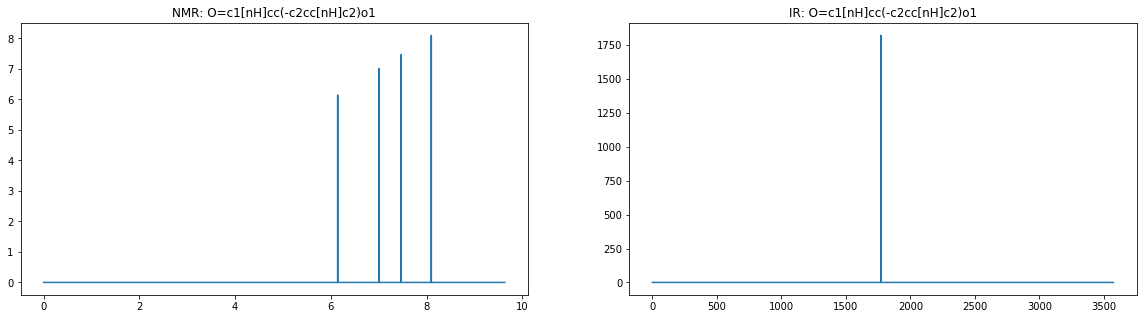

In [28]:
plt.rcParams["figure.figsize"] = (20,5)
nmr, ir = show_spectra('O=c1[nH]cc(-c2cc[nH]c2)o1')

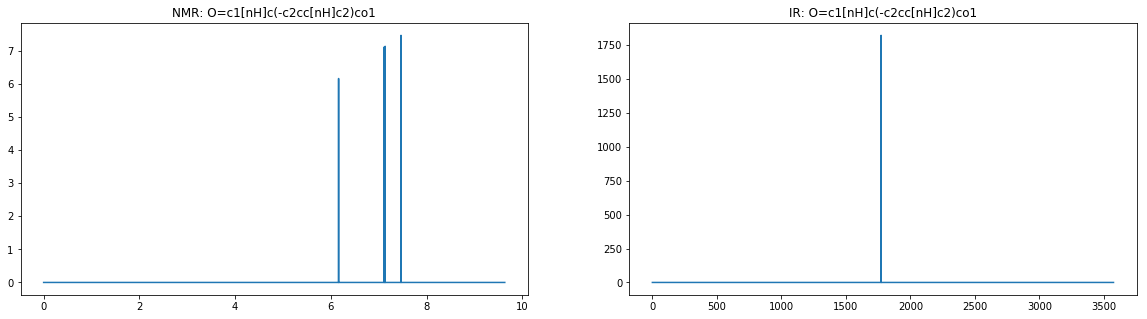

In [29]:
nmr2, ir2 = show_spectra('O=c1[nH]c(-c2cc[nH]c2)co1')

In [56]:
nmr.bin_width

0.0009999999999994458

In [57]:
ir.bin_width

0.06700000000000728

In [58]:
len(nmr.data) * nmr.bin_width

9.63499999999466

In [59]:
len(ir.data) * ir.bin_width

3575.3210000003883

In [63]:
print(len(ir.data), len(nmr.data))

53363 9635


In [65]:
print(len(nmr.data) * nmr.bin_width / 32)
print(len(ir.data) * ir.bin_width / 32)

0.3010937499998331
111.72878125001213


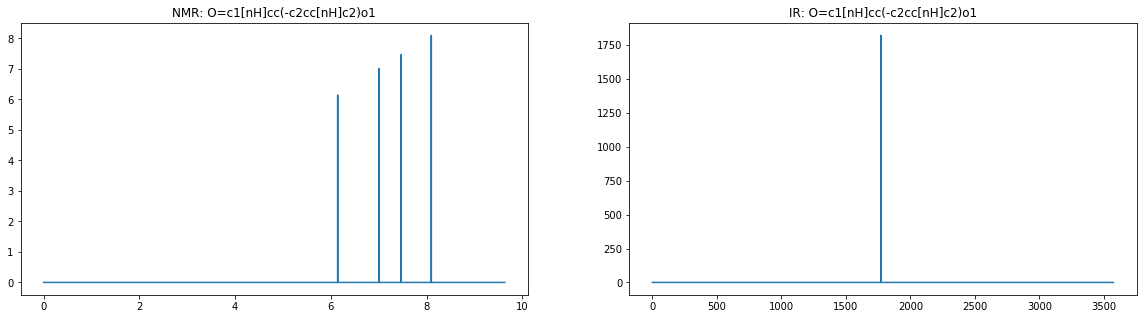

In [30]:
plt.rcParams["figure.figsize"] = (20,5)
nmr1, ir1 = show_spectra('O=c1[nH]cc(-c2cc[nH]c2)o1')

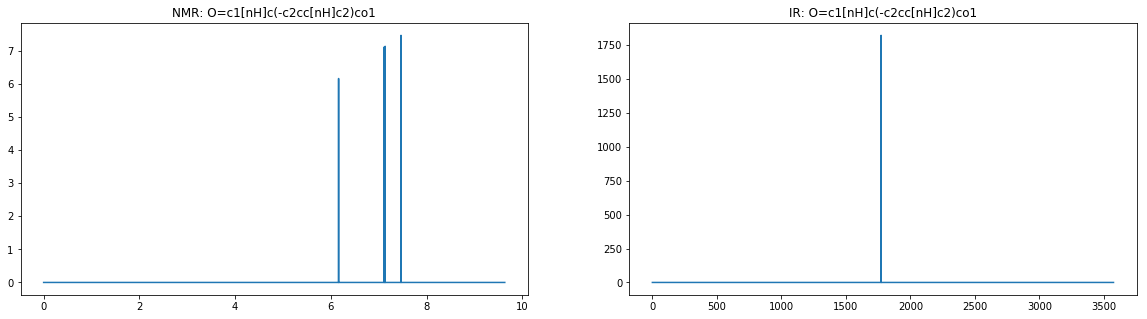

In [31]:
nmr2, ir2 = show_spectra('O=c1[nH]c(-c2cc[nH]c2)co1')